In [1]:
import numpy as np
import matplotlib.pylab as plot
import math
import fit_functions
import fit_lc

In [2]:
#t=np.logspace(0.1,3,100)
lc=fit_lc.read_lc('../GRBs/GRB050502B/')
t=np.array(lc['Time'])

In [3]:
xflares=np.array([600.,3e4,6e4])
yflares=np.array([70,0.03,0.05])
t2=xflares/4.#np.array([150,1e4,3e4])   # bigger number = wider/shallower decay
#ts=-10   # must be negative (>-10)
#t1=(xflares-ts)**2/t2
#t1=[5000,1e4,1e3]
#tpeak=ts+sqrt(t1*t2)
#width=t2*(9+12*np.sqrt(t1/t2))**0.5
#ts=tpeak-width ????
width=xflares*1.3
t1=((((width/t2)**2)-9)/12)**2*t2
ts=[xflares[i]-np.sqrt(t1[i]*t2[i]) for i in range(3)]
print 't1= ',t1
print 't2= ',t2
print 'ts= ',ts
pflares=[np.hstack([yflares[i],ts[i],t1[i],t2[i]]) for i in range(3)]
pflares=np.array(np.ravel(pflares))
k=(1+4./3*np.sqrt(t1/t2))**(-0.5)
print 'w= ',width
print 'k= ',k
print -t1/(xflares-ts)-(xflares-ts)/t2
print xflares-width
#print pflares

t1=  [   339.00166667  16950.08333333  33900.16666667]
t2=  [   150.   7500.  15000.]
ts=  [374.5, 18725.0, 37450.0]
w=  [   780.  39000.  78000.]
k=  [ 0.57692308  0.57692308  0.57692308]
[-3.00666667 -3.00666667 -3.00666667]
[  -180.  -9000. -18000.]


[  1.00000000e+01   7.00000000e-01   7.00000000e+01   3.74500000e+02
   3.39001667e+02   1.50000000e+02   3.00000000e-02   1.87250000e+04
   1.69500833e+04   7.50000000e+03   5.00000000e-02   3.74500000e+04
   3.39001667e+04   1.50000000e+04]


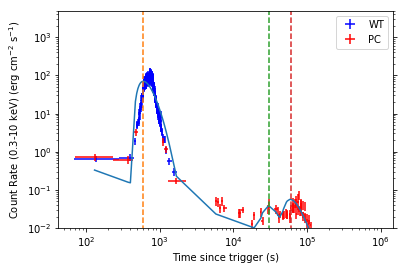

In [9]:
plot.figure()
p=np.append([10,0.7],pflares)#,A,ts,t1,t2]
print p
fit_lc.plot_lcfit(lc=lc,noshow=True)
y=fit_functions.Norris3_pow(t,*p)
plot.plot(t,y)
#plot.plot(t,fit_functions.pow(t,*p[0:2]))
#plot.plot(t,fit_functions.Norris(t,*p[2:6]))
#plot.plot(t,fit_functions.Norris(t,*p[6:10]))
#plot.plot(t,fit_functions.Norris(t,*p[10:14]))
[plot.plot([xf,xf],[1e-4,1e10],linestyle='--') for xf in xflares]
plot.xscale('log')
plot.yscale('log')
plot.ylim([1e-2,5e3])
plot.show()